### Importing Libraries

In [1]:
import pandas
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [59]:
df = pandas.read_csv("final_data.csv")

In [60]:
df.shape

(156, 4)

In [61]:
df.head(5)

,Unnamed: 0,0,1,2
0,2,0.051055,-0.394359,-0.501059
1,3,-2.524284,1.169424,1.723913
2,0,0.105513,-0.393194,-0.457854
3,2,0.044383,-0.394382,-0.502836
4,2,3.429589,0.693525,1.351132


In [62]:
df.columns = ['Words', 'Mean', 'Variance', 'Standard Deviation']

In [63]:
df.head(5)

,Words,Mean,Variance,Standard Deviation
0,2,0.051055,-0.394359,-0.501059
1,3,-2.524284,1.169424,1.723913
2,0,0.105513,-0.393194,-0.457854
3,2,0.044383,-0.394382,-0.502836
4,2,3.429589,0.693525,1.351132


In [64]:
df.corr(method ='pearson')

,Words,Mean,Variance,Standard Deviation
Words,1.000000,0.068739,-0.015086,0.008276
Mean,0.068739,1.000000,-0.024911,-0.050950
Variance,-0.015086,-0.024911,1.000000,0.962323
Standard Deviation,0.008276,-0.050950,0.962323,1.000000


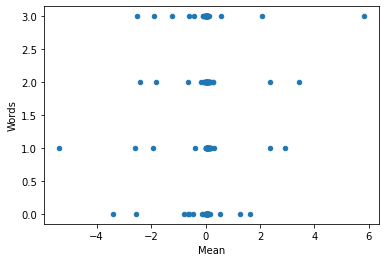

In [65]:
df.plot(kind = 'scatter', x = 'Mean', y = 'Words')  
plt.show()

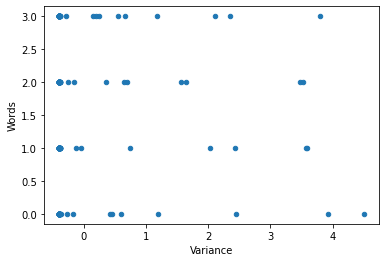

In [66]:
df.plot(kind = 'scatter', x = 'Variance', y = 'Words')  
plt.show()

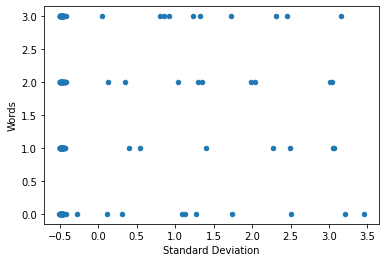

In [67]:
df.plot(kind = 'scatter', x = 'Standard Deviation', y = 'Words')  
plt.show()

In [68]:
df.drop(columns = 'Variance', inplace = True)
# df.drop(columns = 'Standard Deviation', inplace = True)

In [69]:
y = df.iloc[:, 0]
x = df.iloc[:, 1: ]

In [70]:
x.head(5)

,Mean,Standard Deviation
0,0.051055,-0.501059
1,-2.524284,1.723913
2,0.105513,-0.457854
3,0.044383,-0.502836
4,3.429589,1.351132


In [71]:
y.head(5)

0    2
1    3
2    0
3    2
4    2
Name: Words, dtype: int64

### Classification

In [72]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [73]:
x_train.shape, x_test.shape

((117, 2), (39, 2))

In [74]:
y_train.shape, y_test.shape

((117,), (39,))

#### Multilayer Perceptron

In [98]:
iter = []
acc = []
max_accuracy = 0
for i in range(1, 50) :
    clf = MLPClassifier(hidden_layer_sizes=(1000, 100, 10), max_iter=i, alpha=0.001, solver='sgd')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    iter.append(i)
    cur_acc = accuracy_score(y_test, y_pred)
    max_accuracy = max(max_accuracy, cur_acc)
    acc.append(cur_acc)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimiza

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (33) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the opti

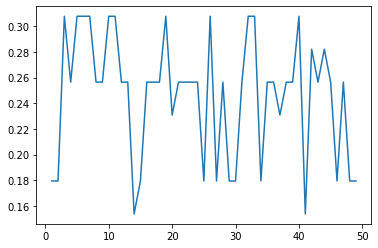

In [99]:
plt.plot(iter, acc)

In [101]:
print("Maximum Accuracy achieved ", max_accuracy * 100)

Maximum Accuracy achieved  30.76923076923077


#### Support Vector Machine

In [79]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [102]:
iter = []
acc = []
max_accuracy = 0
for i in range(1, 150):
    classifier = make_pipeline(StandardScaler(), LinearSVC(max_iter=i))
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    iter.append(i)
    cur_acc = accuracy_score(y_test, y_pred)
    max_accuracy = max(max_accuracy, cur_acc)
    acc.append(cur_acc)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

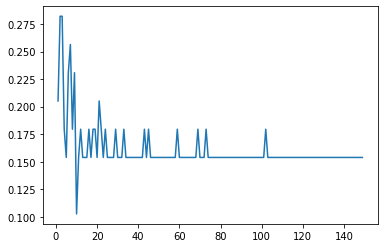

In [103]:
plt.plot(iter, acc)

In [104]:
print("Maximum Accuracy achieved ", max_accuracy * 100)

Maximum Accuracy achieved  28.205128205128204


#### Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

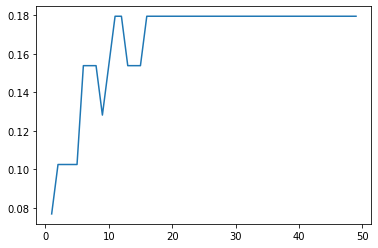

In [105]:
iter = []
acc = []
max_accuracy = 0
for i in range(1, 50):
    classifier = RandomForestClassifier(max_depth=i, random_state=0)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    iter.append(i)
    cur_acc = accuracy_score(y_test, y_pred)
    max_accuracy = max(max_accuracy, cur_acc)
    acc.append(cur_acc)
plt.plot(iter, acc)

In [106]:
print("Maximum Accuracy achieved ", max_accuracy * 100)

Maximum Accuracy achieved  17.94871794871795


#### K-NN

In [84]:
from sklearn.neighbors import KNeighborsClassifier

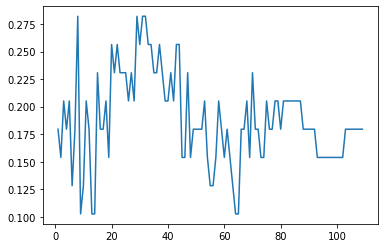

In [107]:
iter = []
acc = []
max_accuracy = 0
for i in range(1, 110):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    iter.append(i)
    cur_acc = accuracy_score(y_test, y_pred)
    max_accuracy = max(max_accuracy, cur_acc)
    acc.append(cur_acc)
plt.plot(iter, acc)

In [108]:
print("Maximum Accuracy achieved ", max_accuracy * 100)

Maximum Accuracy achieved  28.205128205128204
